In [40]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [41]:
# Load the dataset
dataset = pd.read_excel("Dataset/bcrp.xlsx", sheet_name="bcrp")

In [42]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City                          152 non-null    object 
 1   Year                          152 non-null    int64  
 2   Population  (in Lakhs)        152 non-null    float64
 3   Murder                        152 non-null    int64  
 4   Dacoity                       152 non-null    int64  
 5   Robbery                       152 non-null    int64  
 6   Burglary                      152 non-null    int64  
 7   Theft                         152 non-null    int64  
 8   Kidnapping & Abduction        152 non-null    int64  
 9   Rape                          152 non-null    int64  
 10  Riots                         152 non-null    int64  
 11  Dowry Deaths                  152 non-null    int64  
 12  Cruelty by Husband/Relatives  152 non-null    int64  
 13  Attem

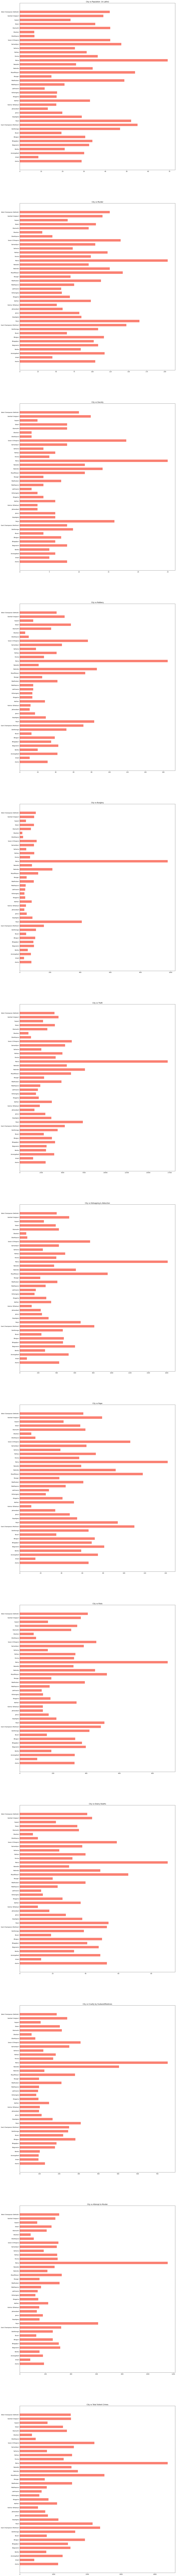

In [43]:
fig, ax = plt.subplots(13, 1, figsize=(21, 350))

for i in range(0, 13):
    ax[i].barh(dataset['City'], dataset[dataset.columns[i+2]], 0.6, color='Salmon')
    ax[i].set_title('City vs ' + dataset.columns[i+2])
plt.show()

In [44]:
new_df = pd.DataFrame(columns=['Year', 'City',  'Number Of Cases', 'Type'])
for i in range(3, 15):
    temp = dataset[['Year', 'City','Population  (in Lakhs)' ]].copy()
    temp['Number Of Cases'] = dataset.iloc[:, i].values
    temp['Type'] = dataset.columns[i]
    new_df = pd.concat([new_df, temp], ignore_index=True)


In [45]:
new_df

,Year,City,Number Of Cases,Type,Population (in Lakhs)
0,2018,Araria,80,Murder,28.12
1,2019,Araria,98,Murder,28.12
2,2020,Araria,104,Murder,28.90
3,2021,Araria,64,Murder,28.10
4,2018,Arwal,35,Murder,7.01
...,...,...,...,...,...
1819,2021,Vaishali (Hajipur),1517,Total Violent Crimes,39.10
1820,2018,West Champaran (Bettiah),1040,Total Violent Crimes,39.35
1821,2019,West Champaran (Bettiah),1205,Total Violent Crimes,40.60
1822,2020,West Champaran (Bettiah),1507,Total Violent Crimes,42.09


In [46]:
new_df['Crime Rate'] = pd.to_numeric(new_df['Number Of Cases'], errors='coerce') / new_df['Population  (in Lakhs)']

In [47]:

new_df

,Year,City,Number Of Cases,Type,Population (in Lakhs),Crime Rate
0,2018,Araria,80,Murder,28.12,2.844950
1,2019,Araria,98,Murder,28.12,3.485064
2,2020,Araria,104,Murder,28.90,3.598616
3,2021,Araria,64,Murder,28.10,2.277580
4,2018,Arwal,35,Murder,7.01,4.992867
...,...,...,...,...,...,...
1819,2021,Vaishali (Hajipur),1517,Total Violent Crimes,39.10,38.797954
1820,2018,West Champaran (Bettiah),1040,Total Violent Crimes,39.35,26.429479
1821,2019,West Champaran (Bettiah),1205,Total Violent Crimes,40.60,29.679803
1822,2020,West Champaran (Bettiah),1507,Total Violent Crimes,42.09,35.804229


In [48]:
new_df = new_df.drop(['Number Of Cases'], axis=1)

In [49]:

new_df

,Year,City,Type,Population (in Lakhs),Crime Rate
0,2018,Araria,Murder,28.12,2.844950
1,2019,Araria,Murder,28.12,3.485064
2,2020,Araria,Murder,28.90,3.598616
3,2021,Araria,Murder,28.10,2.277580
4,2018,Arwal,Murder,7.01,4.992867
...,...,...,...,...,...
1819,2021,Vaishali (Hajipur),Total Violent Crimes,39.10,38.797954
1820,2018,West Champaran (Bettiah),Total Violent Crimes,39.35,26.429479
1821,2019,West Champaran (Bettiah),Total Violent Crimes,40.60,29.679803
1822,2020,West Champaran (Bettiah),Total Violent Crimes,42.09,35.804229


In [50]:
# saving the new dataset as an excel file
new_df.to_excel("Dataset/new_dataset.xlsx", index=False, sheet_name ='Sheet1')

In [51]:
new_dataset = pd.read_excel("Dataset/new_dataset.xlsx", sheet_name="Sheet1")

In [52]:

new_dataset

,Year,City,Type,Population (in Lakhs),Crime Rate
0,2018,Araria,Murder,28.12,2.844950
1,2019,Araria,Murder,28.12,3.485064
2,2020,Araria,Murder,28.90,3.598616
3,2021,Araria,Murder,28.10,2.277580
4,2018,Arwal,Murder,7.01,4.992867
...,...,...,...,...,...
1819,2021,Vaishali (Hajipur),Total Violent Crimes,39.10,38.797954
1820,2018,West Champaran (Bettiah),Total Violent Crimes,39.35,26.429479
1821,2019,West Champaran (Bettiah),Total Violent Crimes,40.60,29.679803
1822,2020,West Champaran (Bettiah),Total Violent Crimes,42.09,35.804229


In [53]:

new_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    1824 non-null   int64  
 1   City                    1824 non-null   object 
 2   Type                    1824 non-null   object 
 3   Population  (in Lakhs)  1824 non-null   float64
 4   Crime Rate              1824 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 71.4+ KB


In [54]:

new_dataset.describe()

,Year,Population (in Lakhs),Crime Rate
count,1824.000000,1824.000000,1824.000000
mean,2019.500000,28.574145,10.077591
std,1.118341,13.536800,22.816444
min,2018.000000,6.360000,0.000000
25%,2018.750000,17.555000,0.928834
50%,2019.500000,28.915000,2.855167
75%,2020.250000,37.577500,8.827486
max,2021.000000,69.200000,249.682081


In [55]:

le = LabelEncoder()

In [56]:
new_dataset['City'] = le.fit_transform(new_dataset['City'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [57]:

# Saving the mapping file for further use
file = open('Mappings/City_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Araria - 0

Arwal - 1

Aurangabad - 2

Banka - 3

Begusarai - 4

Bhagalpur - 5

Bhojpur - 6

Buxar - 7

Darbhanga - 8

East Champaran (Motihari) - 9

Gaya - 10

Gopalganj - 11

Jamui - 12

Jehanabad - 13

Kaimur (Bhabua) - 14

Katihar - 15

Khagaria - 16

Kishanganj - 17

Lakhisarai - 18

Madhepura - 19

Madhubani - 20

Munger - 21

Muzaffarpur - 22

Nalanda - 23

Nawada - 24

Patna - 25

Purnia - 26

Rohtas - 27

Saharsa - 28

Samastipur - 29

Saran (Chhapra) - 30

Sheikhpura - 31

Sheohar - 32

Sitamarhi - 33

Siwan - 34

Supaul - 35

Vaishali (Hajipur) - 36

West Champaran (Bettiah) - 37



In [58]:
new_dataset['Type'] = le.fit_transform(new_dataset['Type'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [59]:

# Saving the mapping file for further use
file = open('Mappings/Type_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Attempt to Murder - 0

Burglary - 1

Cruelty by Husband/Relatives - 2

Dacoity - 3

Dowry Deaths - 4

Kidnapping & Abduction - 5

Murder - 6

Rape - 7

Riots - 8

Robbery - 9

Theft - 10

Total Violent Crimes - 11



In [60]:

new_dataset

,Year,City,Type,Population (in Lakhs),Crime Rate
0,2018,0,6,28.12,2.844950
1,2019,0,6,28.12,3.485064
2,2020,0,6,28.90,3.598616
3,2021,0,6,28.10,2.277580
4,2018,1,6,7.01,4.992867
...,...,...,...,...,...
1819,2021,36,11,39.10,38.797954
1820,2018,37,11,39.35,26.429479
1821,2019,37,11,40.60,29.679803
1822,2020,37,11,42.09,35.804229


In [61]:

x = new_dataset[new_dataset.columns[0:4]].values
x

array([[2018.  ,    0.  ,    6.  ,   28.12],
       [2019.  ,    0.  ,    6.  ,   28.12],
       [2020.  ,    0.  ,    6.  ,   28.9 ],
       ...,
       [2019.  ,   37.  ,   11.  ,   40.6 ],
       [2020.  ,   37.  ,   11.  ,   42.09],
       [2021.  ,   37.  ,   11.  ,   39.4 ]], shape=(1824, 4))

In [62]:
y = new_dataset['Crime Rate'].values
y

array([ 2.84495021,  3.48506401,  3.59861592, ..., 29.67980296,
       35.80422903, 33.85786802], shape=(1824,))

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [64]:
x_train

array([[2.018e+03, 1.500e+01, 5.000e+00, 3.071e+01],
       [2.019e+03, 1.300e+01, 7.000e+00, 1.161e+01],
       [2.021e+03, 3.400e+01, 6.000e+00, 3.530e+01],
       ...,
       [2.019e+03, 2.700e+01, 6.000e+00, 3.061e+01],
       [2.018e+03, 3.400e+01, 2.000e+00, 3.330e+01],
       [2.018e+03, 1.000e+01, 1.100e+01, 4.391e+01]], shape=(1459, 4))

In [65]:
y_train

array([ 8.07554542,  2.92850991,  2.97450425, ...,  3.95295655,
        1.35135135, 25.71168299], shape=(1459,))

In [66]:

model1 = svm.SVR()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [67]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 8.652628122867737
Mean Squared Error: 610.8521880628944
R2 score: -0.08364015561419924


In [68]:
model2 = KNeighborsRegressor(n_neighbors=2)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

In [69]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 8.605333493805345
Mean Squared Error: 536.476855108072
R2 score: 0.048300269503379845


In [70]:
model3 = tree.DecisionTreeRegressor()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.6683691010322472
Mean Squared Error: 78.98425265840264
R2 score: 0.8598834390472706


In [72]:
model4 = RandomForestRegressor(random_state=0)
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)

In [73]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.198450596882441
Mean Squared Error: 50.99092667804583
R2 score: 0.9095430665550459


In [74]:
model5 = MLPRegressor(random_state=0)
model5.fit(x_train, y_train)
y_pred = model5.predict(x_test)

c:\Users\Navendu Kumar Mishra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 9.406318001413247
Mean Squared Error: 458.508804338166
R2 score: 0.18661410764672048


In [76]:

import pickle

In [77]:
#saving the model as .pkl file
pkl_filename = "Model/model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model4, file)

In [78]:

#checking the saved model accuracy
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
score = pickle_model.score(x_test, y_test)
print(score)

0.9095430665550459
